# Assumptions for cleaning data

--->For global cases & deaths dataset, every record/row must have below values and dtypes for the columns:
    
    Date_reported: Date- NON-NULL
    Country_code: String- NON-NULL
    Country: String- NON-NULL
    WHO_region: String- NON-NULL
    New_cases: +ve Integer
    Cumulative_cases: +ve Integer
    New_deaths: +ve Integer
    Cumulative_deaths: +ve Integer
--->For global vaccination dataset, every record/row must have below values and dtypes for the columns:

    COUNTRY: String- NON-NULL
    ISO3: String- NON-NULL(only 3 char)
    WHO_REGION: String- NON-NULL
    DATA_SOURCE: Date- NON-NULL
    DATE_UPDATED: Date- NON-NULL
    TOTAL_VACCINATIONS: +ve Integer
    TOTAL_VACCINATIONS_PER100: +ve float(2 digit)
    PERSONS_VACCINATED_1PLUS_DOSE: +ve Integer
    PERSONS_VACCINATED_1PLUS_DOSE_PER100: +ve float(2 digit)
    PERSONS_FULLY_VACCINATED: +ve Integer
    PERSONS_FULLY_VACCINATED_PER100: +ve Integer
    VACCINES_USED: String- NON-NULL
    PERSONS_BOOSTER_ADD_DOSE: +ve Integer
    PERSONS_BOOSTER_ADD_DOSE_PER100: +ve float(2 digit)
    FIRST_VACCINE_DATE: Date - NON-NULL

# Actions before analysis

    ==> Form the 'No.of_vaccines_used' column global vaccination dataset
    ==> Write the cleansed datasets into a single file

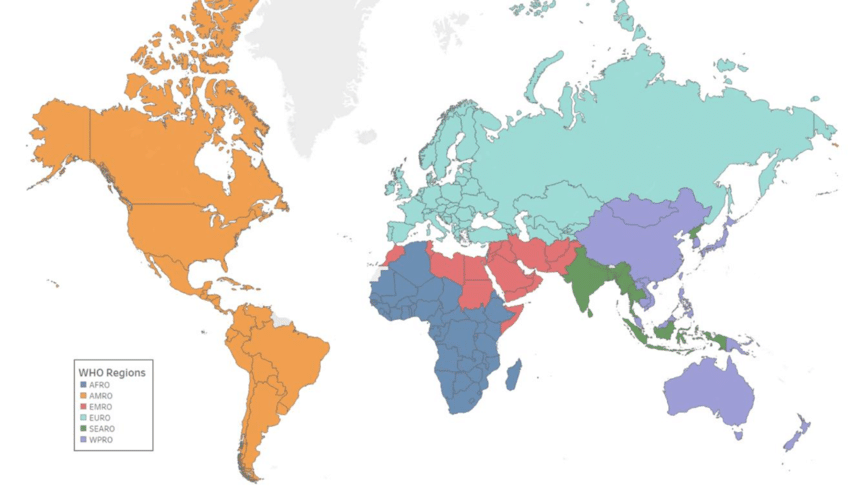

In [1]:
from IPython.display import Image
Image(filename=r"C:\Users\srika\OneDrive\Desktop\Python_practise\Projects\EDA_projects\COVID-WHO-data_analysis\WHO-Regions.png")

In [2]:
import numpy as np
import pandas as pd
import regex as re
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
vaccination_df=pd.read_csv(r"C:\Users\srika\OneDrive\Desktop\Python_practise\Projects\EDA_projects\COVID-WHO-data_analysis\WHO-COVID-19-Global-vaccination.csv")
vaccination_df.index=pd.RangeIndex(start=1,stop=vaccination_df.shape[0]+1,step=1)
vaccination_df.head()
# print(vaccination_df.shape)

,COUNTRY,ISO3,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,VACCINES_USED,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED,PERSONS_BOOSTER_ADD_DOSE,PERSONS_BOOSTER_ADD_DOSE_PER100
1,Afghanistan,AFG,EMRO,REPORTING,2023-01-29,12684950.0,11684678,32.585,30.016,10967235,28.173,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...",2021-02-22,11.0,NaN,NaN
2,Albania,ALB,EURO,REPORTING,2023-01-15,3047340.0,1344582,105.900,47.245,1273313,44.741,"AstraZeneca - Vaxzevria,Gamaleya - Gam-Covid-V...",2021-01-13,5.0,385638.0,13.550
3,Algeria,DZA,AFRO,REPORTING,2022-09-04,15267442.0,7840131,34.817,17.879,6481186,14.780,"Beijing CNBG - BBIBP-CorV,Gamaleya - Gam-Covid...",2021-01-30,4.0,575651.0,1.313
4,American Samoa,ASM,WPRO,REPORTING,2022-09-26,111316.0,44671,201.670,80.930,42547,77.082,"Janssen - Ad26.COV 2-S,Moderna - Spikevax,Pfiz...",2020-12-21,3.0,24160.0,43.770
5,Andorra,AND,EURO,REPORTING,2022-12-18,156242.0,57901,202.200,76.009,53489,70.217,"AstraZeneca - Vaxzevria,Moderna - Spikevax,Pfi...",2021-01-20,3.0,43020.0,56.474


In [4]:
vaccination_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 1 to 229
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   COUNTRY                               229 non-null    object 
 1   ISO3                                  229 non-null    object 
 2   WHO_REGION                            229 non-null    object 
 3   DATA_SOURCE                           229 non-null    object 
 4   DATE_UPDATED                          229 non-null    object 
 5   TOTAL_VACCINATIONS                    228 non-null    float64
 6   PERSONS_VACCINATED_1PLUS_DOSE         229 non-null    int64  
 7   TOTAL_VACCINATIONS_PER100             228 non-null    float64
 8   PERSONS_VACCINATED_1PLUS_DOSE_PER100  229 non-null    float64
 9   PERSONS_FULLY_VACCINATED              229 non-null    int64  
 10  PERSONS_FULLY_VACCINATED_PER100       229 non-null    float64
 11  VACCINES_USED      

In [5]:
Cases_df=pd.read_csv(r"C:\Users\srika\OneDrive\Desktop\Python_practise\Projects\EDA_projects\COVID-WHO-data_analysis\WHO-COVID-19-Global-cases.csv")
Cases_df.index=pd.RangeIndex(start=1,stop=Cases_df.shape[0]+1,step=1)
Cases_df.head()
# print(Cases_df.shape)

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
1,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
5,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


In [6]:
Cases_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267336 entries, 1 to 267336
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Date_reported      267336 non-null  object
 1   Country_code       266208 non-null  object
 2   Country            267336 non-null  object
 3   WHO_region         267336 non-null  object
 4   New_cases          267336 non-null  int64 
 5   Cumulative_cases   267336 non-null  int64 
 6   New_deaths         267336 non-null  int64 
 7   Cumulative_deaths  267336 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 16.3+ MB


## Data cleansing

### Cleansing vaccination_df

In [7]:
vaccination_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 1 to 229
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   COUNTRY                               229 non-null    object 
 1   ISO3                                  229 non-null    object 
 2   WHO_REGION                            229 non-null    object 
 3   DATA_SOURCE                           229 non-null    object 
 4   DATE_UPDATED                          229 non-null    object 
 5   TOTAL_VACCINATIONS                    228 non-null    float64
 6   PERSONS_VACCINATED_1PLUS_DOSE         229 non-null    int64  
 7   TOTAL_VACCINATIONS_PER100             228 non-null    float64
 8   PERSONS_VACCINATED_1PLUS_DOSE_PER100  229 non-null    float64
 9   PERSONS_FULLY_VACCINATED              229 non-null    int64  
 10  PERSONS_FULLY_VACCINATED_PER100       229 non-null    float64
 11  VACCINES_USED      

In [8]:
vaccination_df.FIRST_VACCINE_DATE=pd.to_datetime(vaccination_df['FIRST_VACCINE_DATE'])
vaccination_df.DATE_UPDATED=pd.to_datetime(vaccination_df['DATE_UPDATED'])

In [9]:
vaccination_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 1 to 229
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   COUNTRY                               229 non-null    object        
 1   ISO3                                  229 non-null    object        
 2   WHO_REGION                            229 non-null    object        
 3   DATA_SOURCE                           229 non-null    object        
 4   DATE_UPDATED                          229 non-null    datetime64[ns]
 5   TOTAL_VACCINATIONS                    228 non-null    float64       
 6   PERSONS_VACCINATED_1PLUS_DOSE         229 non-null    int64         
 7   TOTAL_VACCINATIONS_PER100             228 non-null    float64       
 8   PERSONS_VACCINATED_1PLUS_DOSE_PER100  229 non-null    float64       
 9   PERSONS_FULLY_VACCINATED              229 non-null    int64         
 10  PE

In [10]:
vaccination_df.isnull().sum()

COUNTRY                                  0
ISO3                                     0
WHO_REGION                               0
DATA_SOURCE                              0
DATE_UPDATED                             0
TOTAL_VACCINATIONS                       1
PERSONS_VACCINATED_1PLUS_DOSE            0
TOTAL_VACCINATIONS_PER100                1
PERSONS_VACCINATED_1PLUS_DOSE_PER100     0
PERSONS_FULLY_VACCINATED                 0
PERSONS_FULLY_VACCINATED_PER100          0
VACCINES_USED                            4
FIRST_VACCINE_DATE                      22
NUMBER_VACCINES_TYPES_USED               4
PERSONS_BOOSTER_ADD_DOSE                22
PERSONS_BOOSTER_ADD_DOSE_PER100         22
dtype: int64

In [11]:
# Cleansing 'Total_vaccinations' column
vaccination_df[vaccination_df['TOTAL_VACCINATIONS'].isnull()]

,COUNTRY,ISO3,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,VACCINES_USED,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED,PERSONS_BOOSTER_ADD_DOSE,PERSONS_BOOSTER_ADD_DOSE_PER100
65,Eritrea,ERI,AFRO,REPORTING,2022-07-03,NaN,0,NaN,0.0,0,0.0,NaN,NaT,NaN,NaN,NaN


In [12]:
# Filling NaN values in'TOTAL_VACCINATIONS' column with 0 and all other vaccine related stats with 0
vaccination_df.loc[vaccination_df['TOTAL_VACCINATIONS'].isnull(),vaccination_df.columns[5:]]=[0,0,0,0,0,0,np.NaN,np.NaN,0,0,0]

In [13]:
vaccination_df[vaccination_df['TOTAL_VACCINATIONS'].isnull()]

,COUNTRY,ISO3,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,VACCINES_USED,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED,PERSONS_BOOSTER_ADD_DOSE,PERSONS_BOOSTER_ADD_DOSE_PER100


In [14]:
vaccination_df.isnull().sum()

COUNTRY                                  0
ISO3                                     0
WHO_REGION                               0
DATA_SOURCE                              0
DATE_UPDATED                             0
TOTAL_VACCINATIONS                       0
PERSONS_VACCINATED_1PLUS_DOSE            0
TOTAL_VACCINATIONS_PER100                0
PERSONS_VACCINATED_1PLUS_DOSE_PER100     0
PERSONS_FULLY_VACCINATED                 0
PERSONS_FULLY_VACCINATED_PER100          0
VACCINES_USED                            4
FIRST_VACCINE_DATE                      22
NUMBER_VACCINES_TYPES_USED               3
PERSONS_BOOSTER_ADD_DOSE                21
PERSONS_BOOSTER_ADD_DOSE_PER100         21
dtype: int64

In [15]:
# Cleansing 'VACCINES_USED' column

vaccination_df[vaccination_df['VACCINES_USED'].isnull()]

,COUNTRY,ISO3,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,VACCINES_USED,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED,PERSONS_BOOSTER_ADD_DOSE,PERSONS_BOOSTER_ADD_DOSE_PER100
26,Bonaire,XAA,AMRO,REPORTING,2023-01-27,41537.0,17460,198.599,83.481,15919,76.113,NaN,NaT,NaN,8158.0,39.005
65,Eritrea,ERI,AFRO,REPORTING,2022-07-03,0.0,0,0.000,0.000,0,0.000,NaN,NaT,0.0,0.0,0.000
174,Saba,XCA,AMRO,REPORTING,2023-01-27,4471.0,1687,231.298,87.274,1657,85.722,NaN,NaT,NaN,1127.0,58.303
188,Sint Eustatius,XBA,AMRO,REPORTING,2023-01-27,4257.0,1791,135.616,57.056,1686,53.711,NaN,NaT,NaN,780.0,24.849


In [16]:
# Fuction to find the most common vaccine for an input region
print(vaccination_df['WHO_REGION'].unique())
inp_reg=input('Enter the WHO_region to find most common vaccines: ').upper()
filt=vaccination_df['WHO_REGION']==inp_reg.upper()
def most_common_vaccines(filt):
        vaccines=[]
        for i in (vaccination_df[filt][['VACCINES_USED']].index):
            if type(vaccination_df[filt][['VACCINES_USED']].loc[i].values.tolist()[0])==float:
                pass
            else:
                for j in range(len(vaccination_df[filt][['VACCINES_USED']].loc[i].values.tolist()[0].split(','))):
                    vaccines.append(vaccination_df[filt][['VACCINES_USED']].loc[i].values.tolist()[0].split(',')[j])
        common_vaccines=dict()
        for i in range(len(list(set(vaccines)))):
            common_vaccines[list(set(vaccines))[i]]=vaccines.count(list(set(vaccines))[i])
            most_common_vaccines=sorted(common_vaccines.items(),key=lambda x:x[1],reverse=True)
        most_common_vaccines=[most_common_vaccines[i][0] for i in range(3)]
        return most_common_vaccines
if inp_reg.upper() in vaccination_df['WHO_REGION'].unique():
    print(most_common_vaccines(filt))
else:
    print("Enter valid region")

['EMRO' 'EURO' 'AFRO' 'WPRO' 'AMRO' 'SEARO' 'OTHER']
Enter the WHO_region to find most common vaccines: wpro
['Pfizer BioNTech - Comirnaty', 'AstraZeneca - Vaxzevria', 'Janssen - Ad26.COV 2-S']


In [17]:
# Finding most commonly used in the corresponding WHO_Region
unique_regions=vaccination_df['WHO_REGION'].unique().tolist()
vaccines=[]
MCV_region=dict()
for i in unique_regions:
    filt=vaccination_df['WHO_REGION']==i
    MCV_region[i]=most_common_vaccines(filt)
MCV_region=pd.Series(MCV_region)
print(MCV_region)

EMRO     [Sinovac - CoronaVac, Bharat - Covaxin, Beijin...
EURO     [Pfizer BioNTech - Comirnaty, AstraZeneca - Va...
AFRO     [SII - Covishield, Beijing CNBG - BBIBP-CorV, ...
WPRO     [Pfizer BioNTech - Comirnaty, AstraZeneca - Va...
AMRO     [Pfizer BioNTech - Comirnaty, AstraZeneca - Va...
SEARO    [SII - Covishield, Beijing CNBG - BBIBP-CorV, ...
OTHER    [Pfizer BioNTech - Comirnaty, Moderna - Spikev...
dtype: object


In [18]:
#Filling null values in 'VACCINES_USED' column with the above series of region wise common vaccine
vaccination_df.loc[vaccination_df['VACCINES_USED'].isnull(),'VACCINES_USED']=vaccination_df['WHO_REGION'].map(MCV_region)


In [19]:
# vaccination_df[vaccination_df['VACCINES_USED'].isnull()]
print(vaccination_df.loc[65,['VACCINES_USED']])

VACCINES_USED    [SII - Covishield, Beijing CNBG - BBIBP-CorV, ...
Name: 65, dtype: object


In [20]:
vaccination_df.isnull().sum()

COUNTRY                                  0
ISO3                                     0
WHO_REGION                               0
DATA_SOURCE                              0
DATE_UPDATED                             0
TOTAL_VACCINATIONS                       0
PERSONS_VACCINATED_1PLUS_DOSE            0
TOTAL_VACCINATIONS_PER100                0
PERSONS_VACCINATED_1PLUS_DOSE_PER100     0
PERSONS_FULLY_VACCINATED                 0
PERSONS_FULLY_VACCINATED_PER100          0
VACCINES_USED                            0
FIRST_VACCINE_DATE                      22
NUMBER_VACCINES_TYPES_USED               3
PERSONS_BOOSTER_ADD_DOSE                21
PERSONS_BOOSTER_ADD_DOSE_PER100         21
dtype: int64

In [21]:
# Cleanising 'FIRST_VACCINE_DATE' column

vaccination_df[vaccination_df['FIRST_VACCINE_DATE'].isnull()]

,COUNTRY,ISO3,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,VACCINES_USED,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED,PERSONS_BOOSTER_ADD_DOSE,PERSONS_BOOSTER_ADD_DOSE_PER100
26,Bonaire,XAA,AMRO,REPORTING,2023-01-27,41537.0,17460,198.599,83.481,15919,76.113,"[Pfizer BioNTech - Comirnaty, AstraZeneca - Va...",NaT,NaN,8158.0,39.005
27,"Bonaire, Sint Eustatius and Saba",BES,AMRO,OWID,2021-09-01,35845.0,19109,137.934,73.533,16736,64.401,"Moderna - mRNA-1273, Pfizer BioNTech - Comirnaty",NaT,2.0,NaN,NaN
28,Bosnia and Herzegovina,BIH,EURO,REPORTING,2022-01-29,1924950.0,943394,58.700,28.755,846080,25.789,"AstraZeneca - AZD1222, Pfizer BioNTech - Comir...",NaT,4.0,NaN,NaN
52,Cuba,CUB,AMRO,REPORTING,2023-01-27,38000988.0,10723618,335.502,94.676,10006374,88.344,"CIGB - CIGB-66,Finlay - Soberana Plus,Finlay -...",NaT,3.0,8687355.0,76.699
65,Eritrea,ERI,AFRO,REPORTING,2022-07-03,0.0,0,0.000,0.000,0,0.000,"[SII - Covishield, Beijing CNBG - BBIBP-CorV, ...",NaT,0.0,0.0,0.000
69,Falkland Islands (Malvinas),FLK,AMRO,REPORTING,2022-06-21,9390.0,3220,269.595,92.449,2976,85.444,AstraZeneca - AZD1222,NaT,1.0,2543.0,73.012
70,Faroe Islands,FRO,EURO,OWID,2022-02-18,103894.0,41715,212.614,85.368,40895,83.690,"Moderna - mRNA-1273, Pfizer BioNTech - Comirnaty",NaT,2.0,21284.0,43.557
81,Gibraltar,GIB,EURO,OWID,2022-12-16,132810.0,42175,394.200,125.182,41465,123.074,"AstraZeneca - AZD1222, Pfizer BioNTech - Comir...",NaT,2.0,49170.0,145.944
83,Greenland,GRL,EURO,OWID,2022-03-14,79738.0,41227,140.453,72.619,38511,67.834,Moderna - mRNA-1273,NaT,1.0,NaN,NaN
88,Guernsey,GGY,EURO,OWID,2022-12-19,178525.0,54223,276.920,84.108,52710,81.761,"Moderna - mRNA-1273, AstraZeneca - AZD1222, Pf...",NaT,3.0,69339.0,107.556


In [22]:
# Fuction to find the last vaccination date for an input region

reg_wise_latest_vaccination_date=vaccination_df.groupby(['WHO_REGION'])['FIRST_VACCINE_DATE'].aggregate('max')

In [23]:
#Filling null values in 'FIRST_VACCINE_DATE' column with the above series of latest vaccination dates
vaccination_df.loc[vaccination_df['FIRST_VACCINE_DATE'].isnull(),'FIRST_VACCINE_DATE']=vaccination_df['WHO_REGION'].map(reg_wise_latest_vaccination_date)



In [24]:
vaccination_df.loc[65,:]

COUNTRY                                                                           Eritrea
ISO3                                                                                  ERI
WHO_REGION                                                                           AFRO
DATA_SOURCE                                                                     REPORTING
DATE_UPDATED                                                          2022-07-03 00:00:00
TOTAL_VACCINATIONS                                                                    0.0
PERSONS_VACCINATED_1PLUS_DOSE                                                           0
TOTAL_VACCINATIONS_PER100                                                             0.0
PERSONS_VACCINATED_1PLUS_DOSE_PER100                                                  0.0
PERSONS_FULLY_VACCINATED                                                                0
PERSONS_FULLY_VACCINATED_PER100                                                       0.0
VACCINES_U

In [25]:
vaccination_df.isnull().sum()

COUNTRY                                  0
ISO3                                     0
WHO_REGION                               0
DATA_SOURCE                              0
DATE_UPDATED                             0
TOTAL_VACCINATIONS                       0
PERSONS_VACCINATED_1PLUS_DOSE            0
TOTAL_VACCINATIONS_PER100                0
PERSONS_VACCINATED_1PLUS_DOSE_PER100     0
PERSONS_FULLY_VACCINATED                 0
PERSONS_FULLY_VACCINATED_PER100          0
VACCINES_USED                            0
FIRST_VACCINE_DATE                       0
NUMBER_VACCINES_TYPES_USED               3
PERSONS_BOOSTER_ADD_DOSE                21
PERSONS_BOOSTER_ADD_DOSE_PER100         21
dtype: int64

In [26]:
# Renaming column
vaccination_df.rename(columns={'NUMBER_VACCINES_TYPES_USED':'NUMBER_OF_VACCINES_TYPES_USED'},inplace=True)

In [27]:
# Cleansing 'NUMBER_VACCINES_TYPES_USED' column by pure counting
vaccine_counts=[]
for i in range(1,vaccination_df.shape[0]+1):
        vaccine_counts.append(vaccination_df.loc[i,'VACCINES_USED'].count(',')+1)
vaccination_df['NUMBER_OF_VACCINES_TYPES_USED']=vaccine_counts

In [28]:
vaccination_df.isnull().sum()

COUNTRY                                  0
ISO3                                     0
WHO_REGION                               0
DATA_SOURCE                              0
DATE_UPDATED                             0
TOTAL_VACCINATIONS                       0
PERSONS_VACCINATED_1PLUS_DOSE            0
TOTAL_VACCINATIONS_PER100                0
PERSONS_VACCINATED_1PLUS_DOSE_PER100     0
PERSONS_FULLY_VACCINATED                 0
PERSONS_FULLY_VACCINATED_PER100          0
VACCINES_USED                            0
FIRST_VACCINE_DATE                       0
NUMBER_OF_VACCINES_TYPES_USED            0
PERSONS_BOOSTER_ADD_DOSE                21
PERSONS_BOOSTER_ADD_DOSE_PER100         21
dtype: int64

In [29]:
# Filling null values in 'PERSONS_BOOSTER_ADD_DOSE' and 'PERSONS_BOOSTER_ADD_DOSE_PER100' columns with 0
vaccination_df.loc[vaccination_df['PERSONS_BOOSTER_ADD_DOSE'].isnull()]=vaccination_df['PERSONS_BOOSTER_ADD_DOSE'].fillna(0,inplace=True)

vaccination_df.loc[vaccination_df['PERSONS_BOOSTER_ADD_DOSE_PER100'].isnull()]=vaccination_df['PERSONS_BOOSTER_ADD_DOSE_PER100'].fillna(0,inplace=True)


In [30]:
vaccination_df.isnull().sum()

COUNTRY                                 0
ISO3                                    0
WHO_REGION                              0
DATA_SOURCE                             0
DATE_UPDATED                            0
TOTAL_VACCINATIONS                      0
PERSONS_VACCINATED_1PLUS_DOSE           0
TOTAL_VACCINATIONS_PER100               0
PERSONS_VACCINATED_1PLUS_DOSE_PER100    0
PERSONS_FULLY_VACCINATED                0
PERSONS_FULLY_VACCINATED_PER100         0
VACCINES_USED                           0
FIRST_VACCINE_DATE                      0
NUMBER_OF_VACCINES_TYPES_USED           0
PERSONS_BOOSTER_ADD_DOSE                0
PERSONS_BOOSTER_ADD_DOSE_PER100         0
dtype: int64

### Cleansing Cases_df

In [31]:
Cases_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267336 entries, 1 to 267336
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Date_reported      267336 non-null  object
 1   Country_code       266208 non-null  object
 2   Country            267336 non-null  object
 3   WHO_region         267336 non-null  object
 4   New_cases          267336 non-null  int64 
 5   Cumulative_cases   267336 non-null  int64 
 6   New_deaths         267336 non-null  int64 
 7   Cumulative_deaths  267336 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 16.3+ MB


In [32]:
Cases_df.isnull().sum()

Date_reported           0
Country_code         1128
Country                 0
WHO_region              0
New_cases               0
Cumulative_cases        0
New_deaths              0
Cumulative_deaths       0
dtype: int64

In [33]:
# Converting to positive values
Cases_df['New_cases'] = abs(Cases_df['New_cases'])
Cases_df['New_deaths'] = abs(Cases_df['New_deaths'])


In [34]:
# Cleansing records of 'Namibia' and 'Other' country values
Cases_df.loc[Cases_df['Country'] == 'Namibia', 'Country_code'] = 'NAM'
Cases_df.loc[Cases_df['Country'] == 'Other', 'Country_code'] = 'OTH'

In [35]:
# Cases_df[Cases_df['Country'] == 'Namibia']
Cases_df.isnull().sum()

Date_reported        0
Country_code         0
Country              0
WHO_region           0
New_cases            0
Cumulative_cases     0
New_deaths           0
Cumulative_deaths    0
dtype: int64

## Writing into single file

In [36]:
with pd.ExcelWriter('Final_covid_report.xlsx') as writer:
    Cases_df.to_excel(writer, sheet_name='Cases and Deaths',index=False)
    vaccination_df.to_excel(writer, sheet_name='Vaccination',index=False)

# Questions to be analysed

    ** Find the avg number of cases and deaths for an input country /WHO_region on monthly basis before and after vaccination procedure started in the country
    ** Find the countires which are 1st and last to initiate vaccination for a given input WHO_region
    ** List the top countries from each region based on "% of fully vaccinated" and "% of booster dose vaccinated"

In [37]:
Cases_Df=pd.read_excel(r"C:\Users\srika\OneDrive\Desktop\Python_practise\Projects\EDA_projects\COVID-WHO-data_analysis\Final_covid_report.xlsx",sheet_name='Cases and Deaths',index_col=False)
Cases_Df.index=pd.RangeIndex(start=1,stop=Cases_Df.shape[0]+1,step=1)
Cases_Df.head()


,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
1,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
5,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


In [38]:
Vaccination_Df=pd.read_excel(r"C:\Users\srika\OneDrive\Desktop\Python_practise\Projects\EDA_projects\COVID-WHO-data_analysis\Final_covid_report.xlsx",sheet_name='Vaccination',index_col=False)
Vaccination_Df.index=pd.RangeIndex(start=1,stop=Vaccination_Df.shape[0]+1,step=1)
Vaccination_Df.head()

,COUNTRY,ISO3,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,VACCINES_USED,FIRST_VACCINE_DATE,NUMBER_OF_VACCINES_TYPES_USED,PERSONS_BOOSTER_ADD_DOSE,PERSONS_BOOSTER_ADD_DOSE_PER100
1,Afghanistan,AFG,EMRO,REPORTING,2023-01-29,12684950,11684678,32.585,30.016,10967235,28.173,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...",2021-02-22,11,0,0.000
2,Albania,ALB,EURO,REPORTING,2023-01-15,3047340,1344582,105.900,47.245,1273313,44.741,"AstraZeneca - Vaxzevria,Gamaleya - Gam-Covid-V...",2021-01-13,5,385638,13.550
3,Algeria,DZA,AFRO,REPORTING,2022-09-04,15267442,7840131,34.817,17.879,6481186,14.780,"Beijing CNBG - BBIBP-CorV,Gamaleya - Gam-Covid...",2021-01-30,4,575651,1.313
4,American Samoa,ASM,WPRO,REPORTING,2022-09-26,111316,44671,201.670,80.930,42547,77.082,"Janssen - Ad26.COV 2-S,Moderna - Spikevax,Pfiz...",2020-12-21,3,24160,43.770
5,Andorra,AND,EURO,REPORTING,2022-12-18,156242,57901,202.200,76.009,53489,70.217,"AstraZeneca - Vaxzevria,Moderna - Spikevax,Pfi...",2021-01-20,3,43020,56.474


#### Find the avg number of cases and deaths for an input country on monthly basis before and after vaccination procedure started in the country

In [39]:
# Step-1: Finding FIRST_VACCINE_DATE for an input country
# Step-2: Finding number of cases / deaths till/after FIRST_VACCINE_DATE
# Step-3: Grouping the number of cases / deaths till/after FIRST_VACCINE_DATE on monthly basis
# Step-4: Finding mean of the group number of cases / deaths till/after FIRST_VACCINE_DATE
country_wise_latest_vaccination_date=Vaccination_Df.groupby(['COUNTRY'])['FIRST_VACCINE_DATE'].aggregate('max')
country_wise_latest_vaccination_date

COUNTRY
Afghanistan                      2021-02-22
Albania                          2021-01-13
Algeria                          2021-01-30
American Samoa                   2020-12-21
Andorra                          2021-01-20
                                    ...    
Wallis and Futuna                2021-03-19
Yemen                            2021-04-20
Zambia                           2021-04-14
Zimbabwe                         2021-02-18
occupied Palestinian territory   2021-02-02
Name: FIRST_VACCINE_DATE, Length: 229, dtype: datetime64[ns]

In [40]:
Cases_Df['FIRST_VACCINE_DATE']=Cases_Df['Country'].map(country_wise_latest_vaccination_date)
inp_country=input('Enter the country: ').title()
Cases_Df['Date_reported'] = pd.to_datetime(Cases_Df['Date_reported'])
# Finding average number of cases and deaths monthly till vaccination started
monthly_average_cases_before_vaccination = Cases_Df.query('Country==@inp_country & Date_reported<=FIRST_VACCINE_DATE').groupby(pd.Grouper(key='Date_reported', freq='M'))['New_cases'].agg('mean')
print(monthly_average_cases_before_vaccination)
monthly_average_deaths_before_vaccination = Cases_Df.query('Country==@inp_country & Date_reported<=FIRST_VACCINE_DATE').groupby(pd.Grouper(key='Date_reported', freq='M'))['New_deaths'].agg('mean')
print(monthly_average_deaths_before_vaccination)


Enter the country: India
Date_reported
2020-01-31        0.172414
2020-02-29        0.275862
2020-03-31       40.258065
2020-04-30     1059.966667
2020-05-31     4809.451613
2020-06-30    12823.233333
2020-07-31    34581.612903
2020-08-31    63947.580645
2020-09-30    86817.266667
2020-10-31    61656.645161
2020-11-30    43152.400000
2020-12-31    26934.935484
2021-01-31    17260.437500
Freq: M, Name: New_cases, dtype: float64
Date_reported
2020-01-31       0.000000
2020-02-29       0.000000
2020-03-31       1.032258
2020-04-30      34.733333
2020-05-31     131.935484
2020-06-30     390.966667
2020-07-31     608.193548
2020-08-31     926.516129
2020-09-30    1100.933333
2020-10-31     778.838710
2020-11-30     516.600000
2020-12-31     374.161290
2021-01-31     209.687500
Freq: M, Name: New_deaths, dtype: float64


In [41]:
# Finding average number of cases and deaths monthly after vaccination started
monthly_average_cases_after_vaccination = Cases_Df.query('Country==@inp_country & Date_reported>FIRST_VACCINE_DATE').groupby(pd.Grouper(key='Date_reported', freq='M'))['New_cases'].agg('mean')
print(monthly_average_cases_after_vaccination)
monthly_average_deaths_after_vaccination = Cases_Df.query('Country==@inp_country & Date_reported>FIRST_VACCINE_DATE').groupby(pd.Grouper(key='Date_reported', freq='M'))['New_deaths'].agg('mean')
print(monthly_average_deaths_after_vaccination)


Date_reported
2021-01-31     13556.133333
2021-02-28     12519.571429
2021-03-31     33954.967742
2021-04-30    220454.700000
2021-05-31    299501.870968
2021-06-30     77177.133333
2021-07-31     40359.516129
2021-08-31     37254.419355
2021-09-30     32370.000000
2021-10-31     17203.870968
2021-11-30     10484.066667
2021-12-31      8096.193548
2022-01-31    208504.387097
2022-02-28     57917.500000
2022-03-31      3235.806452
2022-04-30      1714.133333
2022-05-31      2652.354839
2022-06-30      9802.566667
2022-07-31     18311.193548
2022-08-31     13180.064516
2022-09-30      5297.133333
2022-10-31      2138.225806
2022-11-30       675.100000
2022-12-31       194.741935
2023-01-31       141.935484
2023-02-28       112.666667
Freq: M, Name: New_cases, dtype: float64
Date_reported
2021-01-31     145.400000
2021-02-28      99.178571
2021-03-31     174.741935
2021-04-30    1528.733333
2021-05-31    3895.806452
2021-06-30    2311.800000
2021-07-31     817.935484
2021-08-31     475.80

#### Find the countires which are 1st and last to initiate vaccination for a given input WHO_region

In [42]:
inp_region=input('Enter region name: ').upper()
if inp_region in Vaccination_Df['WHO_REGION'].unique():
    Last_vaccine_date=Vaccination_Df.groupby(["WHO_REGION"])["FIRST_VACCINE_DATE"].aggregate("max").loc[inp_region]
    Early_vaccine_date=Vaccination_Df.groupby(["WHO_REGION"])["FIRST_VACCINE_DATE"].aggregate("min").loc[inp_region]
    Country_last_to_vaccine=Vaccination_Df.query('FIRST_VACCINE_DATE==@Last_vaccine_date & WHO_REGION==@inp_region')[['COUNTRY','FIRST_VACCINE_DATE']]
    Country_first_to_vaccine=Vaccination_Df.query('FIRST_VACCINE_DATE==@Early_vaccine_date & WHO_REGION==@inp_region')[['COUNTRY','FIRST_VACCINE_DATE']]
    print(Country_first_to_vaccine)
    print(Country_last_to_vaccine)
else:
    print('Enter valid region')
# groupby(['WHO_REGION'])['FIRST_VACCINE_DATE'].aggregate('max')

Enter region name: searo
      COUNTRY FIRST_VACCINE_DATE
97  Indonesia         2021-01-13
         COUNTRY FIRST_VACCINE_DATE
206  Timor-Leste         2021-04-07


#### List the top countries from each region based on "% of fully vaccinated" and "% of booster dose vaccinated"

In [43]:
# Top countries with PERSONS_FULLY_VACCINATED_PER100

TOP_COUNTRIES_PERSONS_FULLY_VACCINATED_PER100 = Vaccination_Df[['COUNTRY','WHO_REGION','PERSONS_FULLY_VACCINATED_PER100']].groupby('WHO_REGION').apply(lambda x: x.sort_values('PERSONS_FULLY_VACCINATED_PER100', ascending=False).head(1))
print('Region wise countries with highest fully vaccinated percentages:')
TOP_COUNTRIES_PERSONS_FULLY_VACCINATED_PER100.reset_index(level=1,drop=True)


Region wise countries with highest fully vaccinated percentages:


,COUNTRY,WHO_REGION,PERSONS_FULLY_VACCINATED_PER100
WHO_REGION,,,
AFRO,Mauritius,AFRO,85.561
AMRO,Puerto Rico,AMRO,93.674
EMRO,United Arab Emirates,EMRO,99.008
EURO,Gibraltar,EURO,123.074
OTHER,Liechtenstein,OTHER,67.995
SEARO,Bhutan,SEARO,87.826
WPRO,Tokelau,WPRO,163.185


In [44]:
# Top countries with PERSONS_BOOSTER_ADD_DOSE_PER100

TOP_COUNTRIES_PERSONS_PERSONS_BOOSTER_ADD_DOSE_PER100 = Vaccination_Df[['COUNTRY','WHO_REGION','PERSONS_BOOSTER_ADD_DOSE_PER100']].groupby('WHO_REGION').apply(lambda x: x.sort_values('PERSONS_BOOSTER_ADD_DOSE_PER100', ascending=False).head(1))
print('Region wise countries with highest booster dose percentage:')
TOP_COUNTRIES_PERSONS_PERSONS_BOOSTER_ADD_DOSE_PER100.reset_index(level=1,drop=True)


Region wise countries with highest booster dose percentage:


,COUNTRY,WHO_REGION,PERSONS_BOOSTER_ADD_DOSE_PER100
WHO_REGION,,,
AFRO,Mauritius,AFRO,50.286
AMRO,Chile,AMRO,82.224
EMRO,Qatar,EMRO,66.049
EURO,Gibraltar,EURO,145.944
OTHER,Liechtenstein,OTHER,47.255
SEARO,Bhutan,SEARO,82.249
WPRO,Singapore,WPRO,78.558


## Visualizations

1. Display the distribution(histogram) of cases and deaths for an input country on monthly basis and highlight the trend after vaccination date
2. Display top 10 countries (along with the vlaues) with highest number of cases and deaths before and vaccination for an input WHO regions
3. Display the country (along with the vlaues) with highest number of complete vaccinations and booster doses for all WHO regions
4. For an input time period(ex: 2022 Jan), plot a pie chart showing each WHO_region with total number of cases and deaths observed in that month

##### 1.Display the distribution(histogram) of cases and deaths for an input country on monthly basis

In [846]:
Inp_country=input('Enter the country name to view the weekly distribution of covid cases:')
filter1=Cases_Df['Country']==Inp_country
# Cases_Df[filter1].head(-5)

# Grouping the cases for the input country on weekly basis
df_monthly_cases = Cases_Df[filter1].groupby(pd.Grouper(key='Date_reported', freq='M'))['New_cases'].sum().reset_index()
# df_monthly_cases
df_monthly_deaths=Cases_Df[filter1].groupby(pd.Grouper(key='Date_reported', freq='M'))['New_deaths'].sum().reset_index()
# df_monthly_deaths


Enter the country name to view the weekly distribution of covid cases:United States of America


In [847]:
# Format the 'date' column as 'MMM YYYY' to represet on x-axis
df_monthly_cases['Date_formatted'] = df_monthly['Date_reported'].dt.strftime('%b-%y')
df_monthly_cases.set_index('Date_reported', inplace=True)
# Finding x-axis ticks
Date_formatted=df_monthly_cases['Date_formatted'].tolist()
# Finding y-axis ticks
New_cases=df_monthly_cases['New_cases'].tolist()
New_deaths=df_monthly_deaths['New_deaths'].tolist()
Vaccination_line=Vaccination_Df[Vaccination_Df['COUNTRY']==Inp_country]['FIRST_VACCINE_DATE'].dt.strftime('%b-%y').tolist()[0]

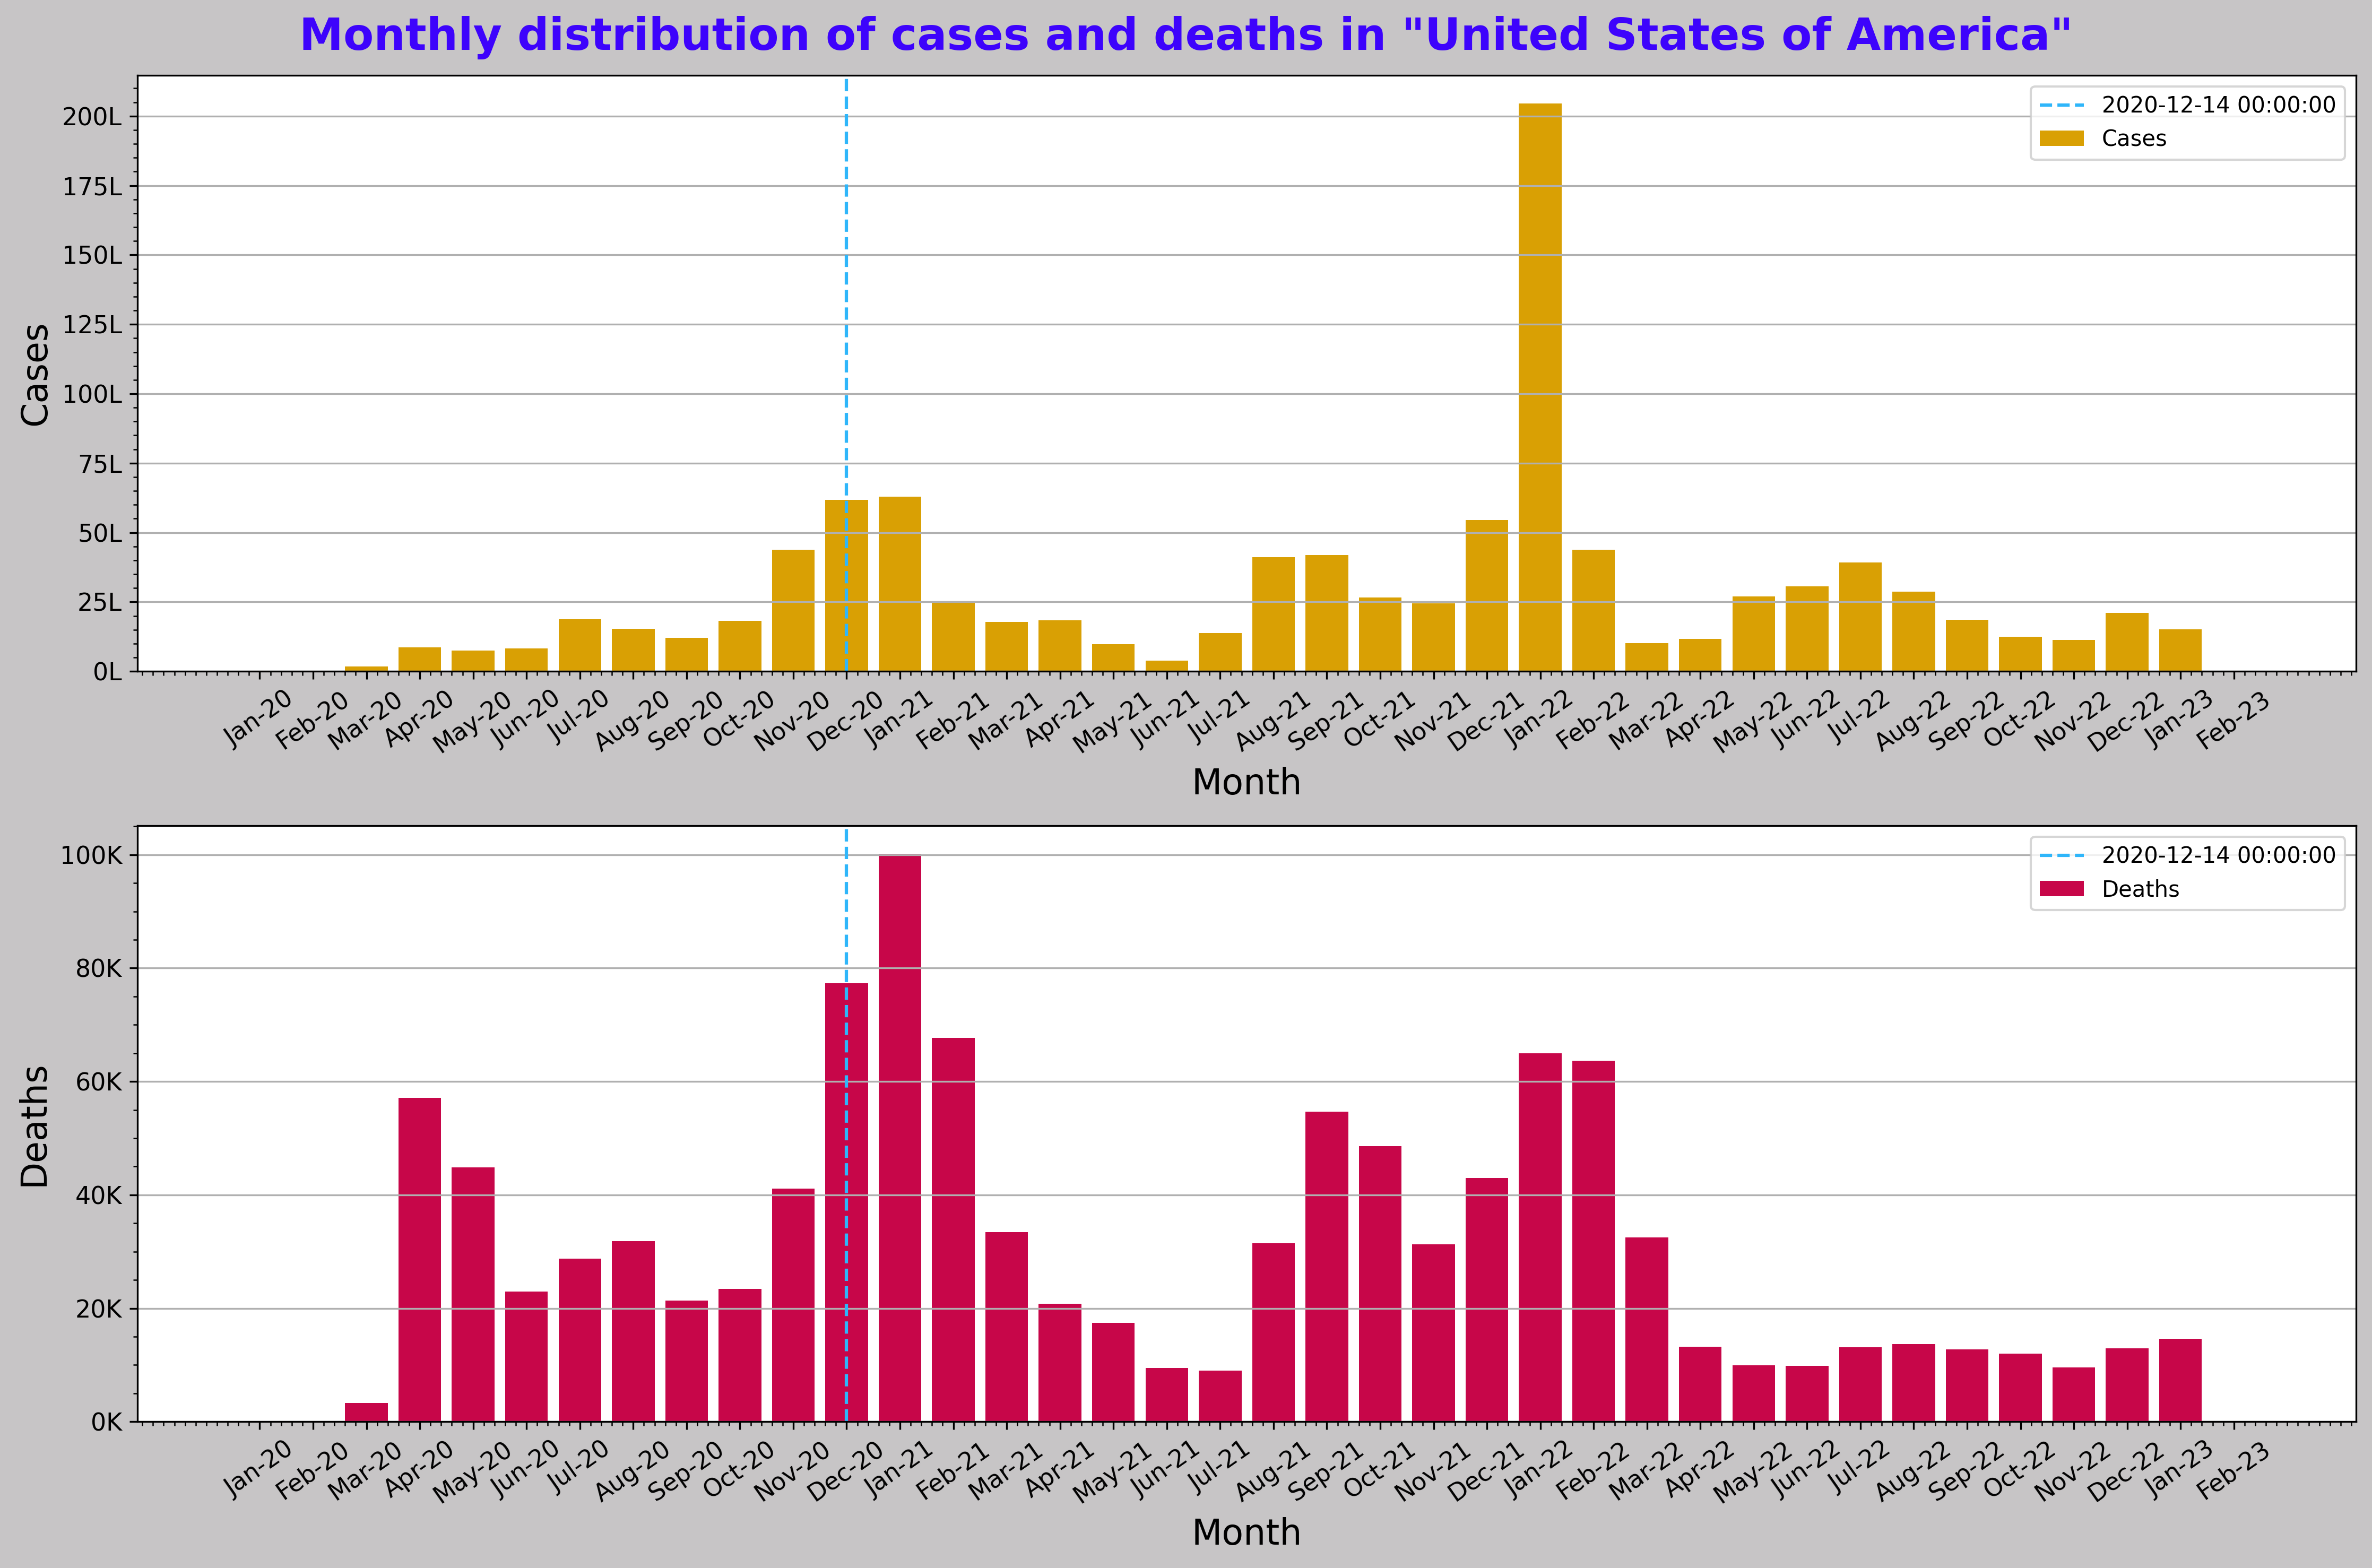

In [848]:
fig,axes=plt.subplots(2,1,facecolor='#c7c5c6',figsize=(15,10),dpi=300)
plt.suptitle('Monthly distribution of cases and deaths in "'+Inp_country+'"',color='#3d03fc',weight='bold',size=20)
# 1st plot
axes[0].bar(Date_formatted,New_cases,color='#d9a004',label='Cases')
# define the y-tick scaling function
def scaling_cases_count(x, pos):
    return f'{x/100000:.0f}L'

y_formatter = ticker.FuncFormatter(scaling_cases_count)
axes[0].yaxis.set_major_formatter(y_formatter)

axes[0].set_xlabel('Month',fontsize=16)
axes[0].set_ylabel('Cases',fontsize=16)
axes[0].axvline(x=Vaccination_line,color='#2fb6fa',linestyle='dashed',linewidth=1.5,label=Vaccination_Df[Vaccination_Df['COUNTRY']==Inp_country]['FIRST_VACCINE_DATE'].tolist()[0])
axes[0].legend()
axes[0].tick_params(axis='x', which='major', labelsize=5,rotation=35)
axes[0].grid(axis='y')
axes[0].minorticks_on()
axes[0].tick_params(axis='both', which='major', labelsize=11)

# 2nd plot
axes[1].bar(Date_formatted,New_deaths,color='#c70649',label='Deaths')
# define the y-tick scaling function
def scaling_cases_count(x, pos):
    return f'{x/1000:.0f}K'

y_formatter = ticker.FuncFormatter(scaling_cases_count)
axes[1].yaxis.set_major_formatter(y_formatter)

axes[1].set_xlabel('Month',fontsize=16)
axes[1].set_ylabel('Deaths',fontsize=16)
axes[1].axvline(x=Vaccination_line,color='#2fb6fa',linestyle='dashed',linewidth=1.5,label=Vaccination_Df[Vaccination_Df['COUNTRY']==Inp_country]['FIRST_VACCINE_DATE'].tolist()[0])
axes[1].legend()
axes[1].tick_params(axis='x', which='major', labelsize=5,rotation=35)
axes[1].grid(axis='y')
axes[1].minorticks_on()
axes[1].tick_params(axis='both', which='major', labelsize=11)
plt.tight_layout();


##### 2. Display top 10 countries (along with the vlaues) with highest number of cases and deaths before and vaccination for an input WHO regions

In [759]:
Inp_region=input('Enter the WHO region: ').upper()
print(Inp_region)
Pre_vaccination=Cases_Df.query('WHO_region==@Inp_region & Date_reported<=FIRST_VACCINE_DATE').groupby('Country')[['New_deaths','New_cases']].agg('sum').sort_values(by=['New_cases','New_deaths'],ascending=False).head(10)
Post_vaccination=Cases_Df.query('WHO_region==@Inp_region & Date_reported>FIRST_VACCINE_DATE').groupby('Country')[['New_deaths','New_cases']].agg('sum').sort_values(by=['New_cases','New_deaths'],ascending=False).head(10)
# print(Pre_vaccination)
# print(Post_vaccination)


Enter the WHO region: amro
AMRO


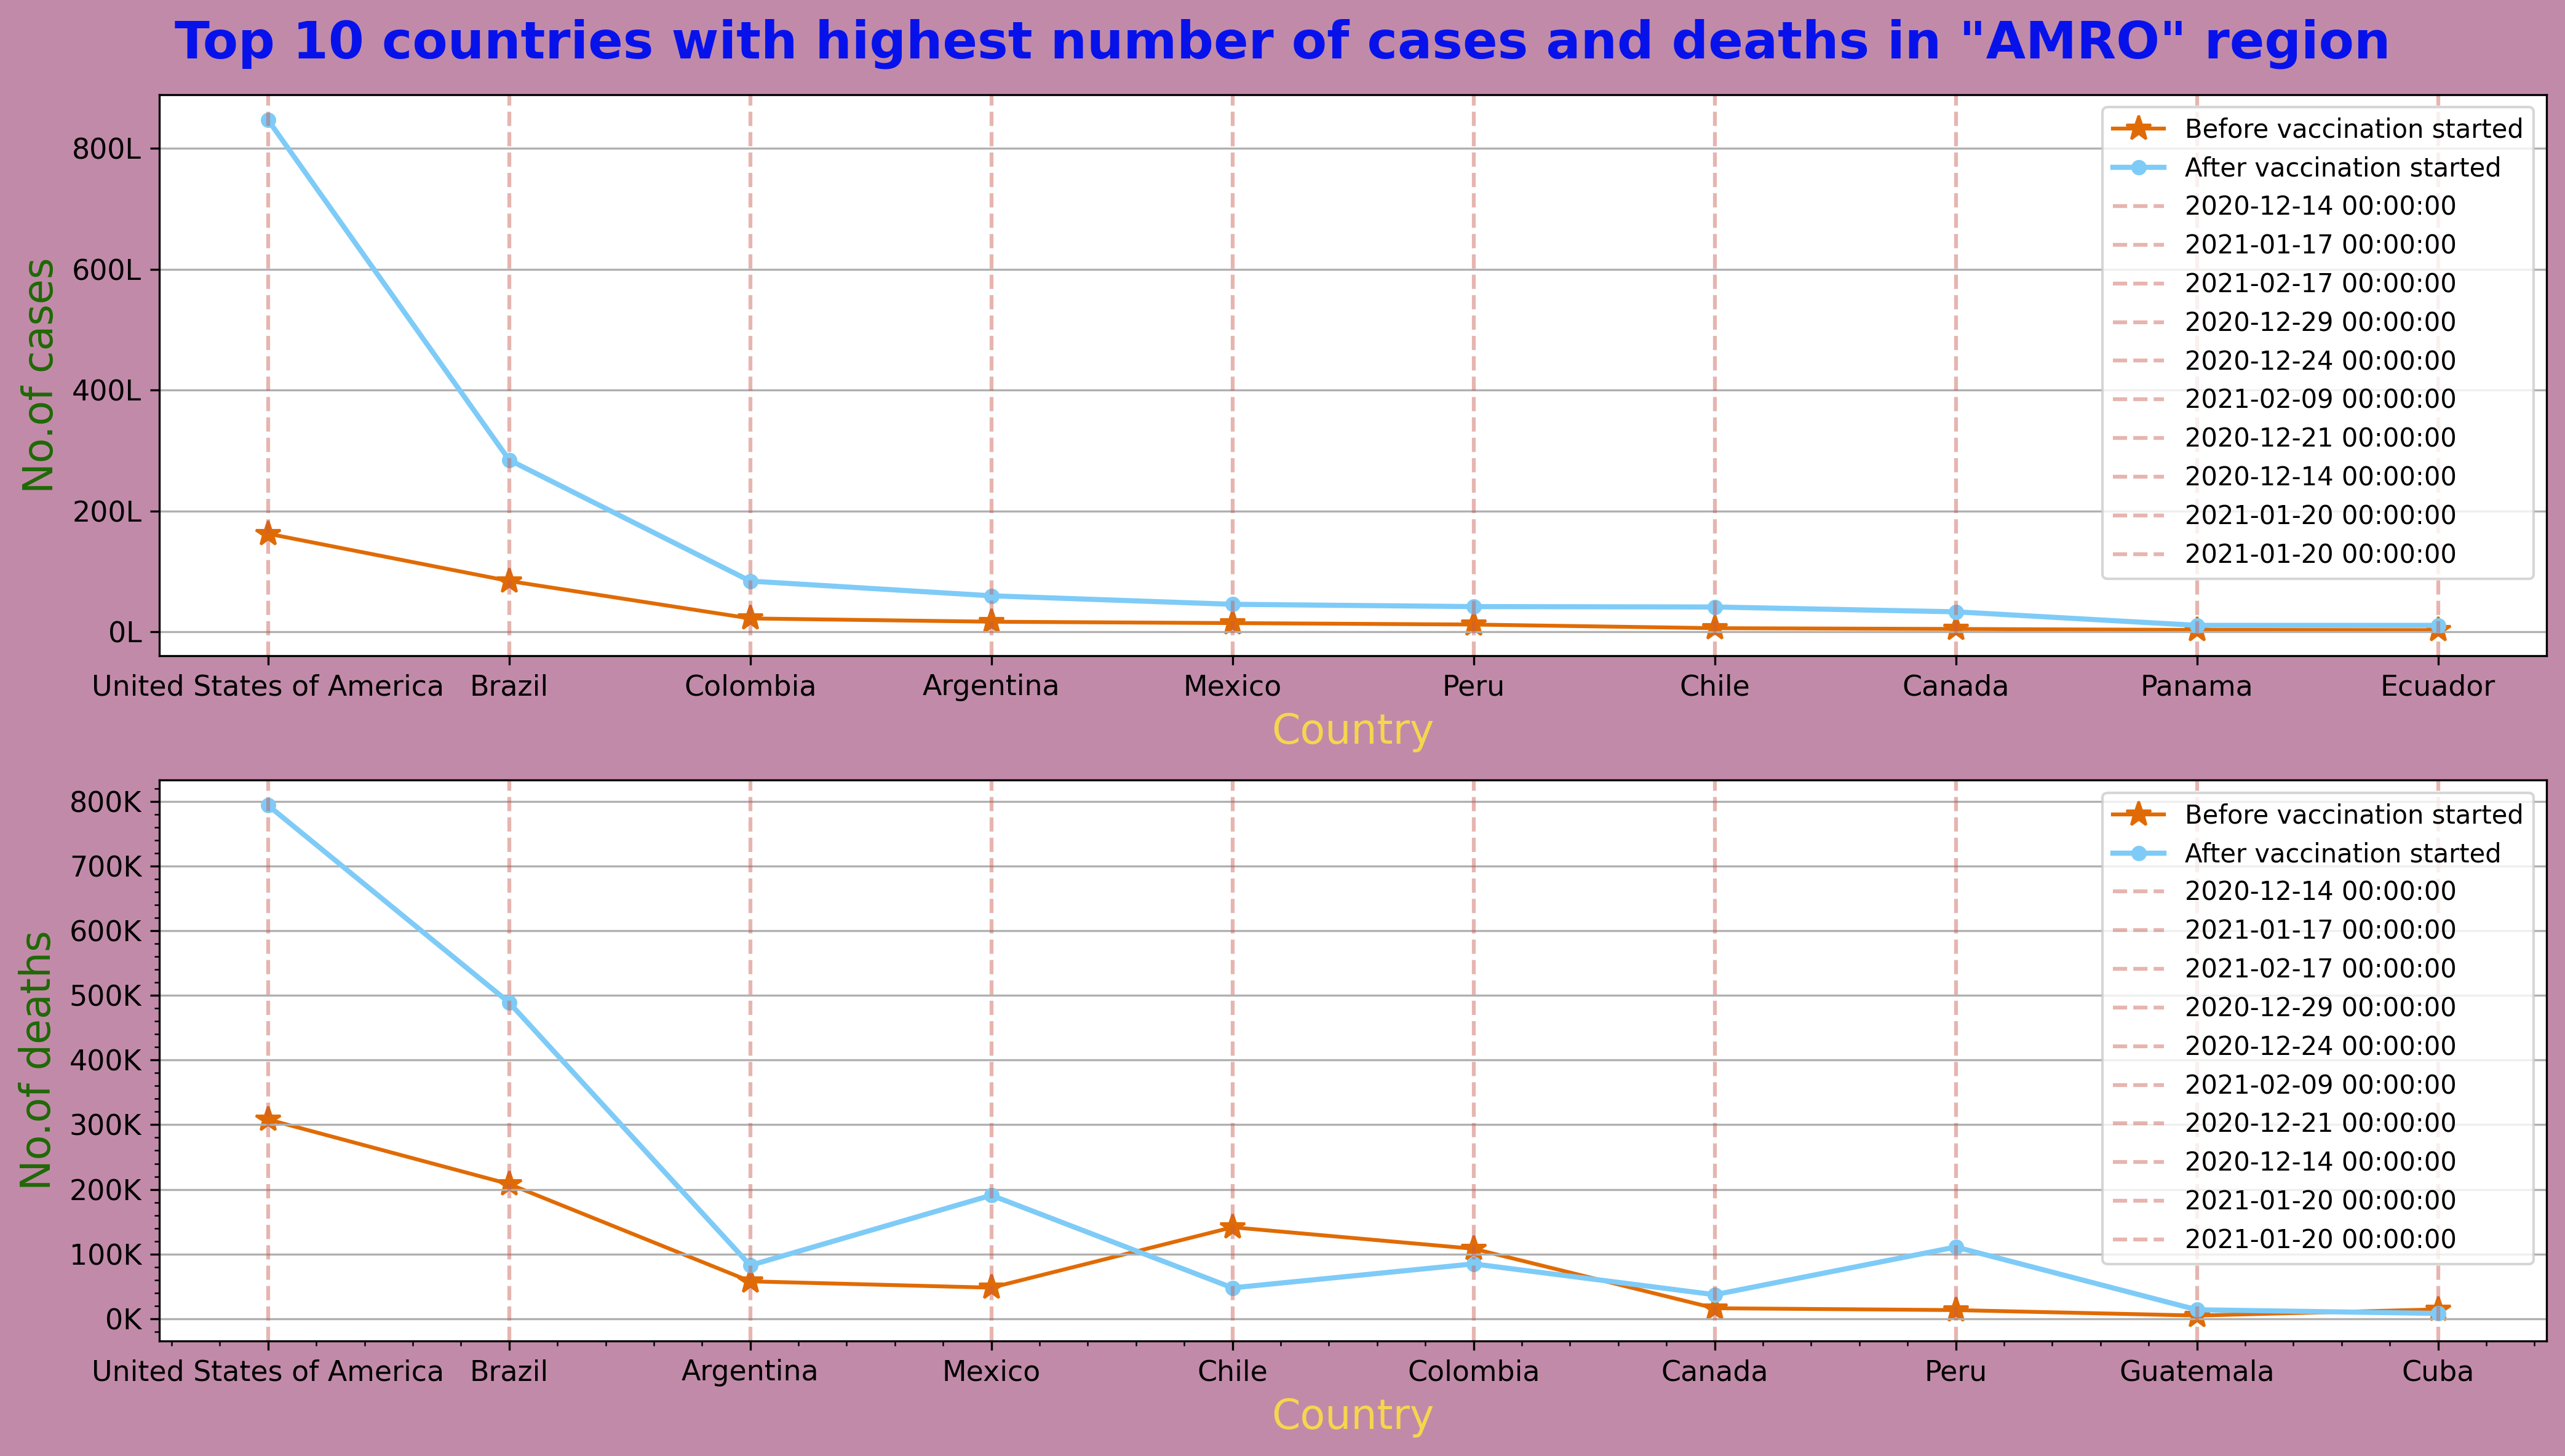

In [760]:
fig,axes=plt.subplots(2,1,facecolor='#c28aa9',figsize=(14,8),dpi=300)
plt.suptitle('Top 10 countries with highest number of cases and deaths in "'+Inp_region+'" region',color='#0712eb',weight='bold',size=20)

axes[0].plot(Pre_vaccination['New_cases'].values.tolist(),color='#e06b04',marker='*',markersize=10,label='Before vaccination started',lw=1.5,zorder=1)
axes[0].plot(Post_vaccination['New_cases'].values.tolist(),color='#7ecbf7',marker='o',markersize=5,label='After vaccination started',lw=2,alpha=1)
# define the y-tick scaling function
def scaling_cases_count1(x, pos):
    return f'{x/100000:.0f}L'

y_formatter = ticker.FuncFormatter(scaling_cases_count1)
axes[0].yaxis.set_major_formatter(y_formatter)

axes[0].set_xlabel('Country',fontsize=16,color='#f5d64e')
axes[0].set_ylabel('No.of cases',fontsize=16,color='#1e6905')
for i in Pre_vaccination.index:
        axes[0].axvline(x=i,color='#c95b51',linestyle='dashed',alpha=0.45,linewidth=1.5,label=Vaccination_Df[Vaccination_Df['COUNTRY']==i]['FIRST_VACCINE_DATE'].tolist()[0])
axes[0].legend()
axes[0].set_xticks(ticks=np.arange(len(cases_before_vaccination)),labels=Pre_vaccination.index)
axes[0].grid(axis='y')
axes[0].tick_params(axis='both', which='major', labelsize=11)

# 2nd histogram
axes[1].plot(Pre_vaccination['New_deaths'].values.tolist(),color='#e06b04',marker='*',markersize=10,label='Before vaccination started',lw=1.5,zorder=1)
axes[1].plot(Post_vaccination['New_deaths'].values.tolist(),color='#7ecbf7',marker='o',markersize=5,label='After vaccination started',lw=2,alpha=1)
# # define the y-tick scaling function
def scaling_cases_count2(x, pos):
    return f'{x/1000:.0f}K'

y_formatter = ticker.FuncFormatter(scaling_cases_count2)
axes[1].yaxis.set_major_formatter(y_formatter)

axes[1].set_xlabel('Country',fontsize=16,color='#f5d64e')
axes[1].set_ylabel('No.of deaths',fontsize=16,color='#1e6905')
axes[1].tick_params(axis='x', which='major', labelsize=5)
axes[1].grid(axis='y')
axes[1].set_xticks(ticks=np.arange(len(cases_before_vaccination)),labels=Post_vaccination.index)
for i in Pre_vaccination.index:
    axes[1].axvline(x=i,color='#c95b51',linestyle='dashed',alpha=0.45,linewidth=1.5,label=Vaccination_Df[Vaccination_Df['COUNTRY']==i]['FIRST_VACCINE_DATE'].tolist()[0])
axes[1].tick_params(axis='both', which='major', labelsize=11)
axes[1].minorticks_on()
axes[1].legend()
plt.tight_layout();


##### 3. Display the country (along with the vlaues) with highest number of complete vaccinations and booster doses for all WHO regions

In [832]:
Vaccine_proactive_countries=Vaccination_Df[['COUNTRY','WHO_REGION','PERSONS_FULLY_VACCINATED','PERSONS_BOOSTER_ADD_DOSE']].groupby('WHO_REGION').apply(lambda x: x.sort_values(by=['PERSONS_FULLY_VACCINATED','PERSONS_BOOSTER_ADD_DOSE'], ascending=False).head(1)).reset_index(level=1,drop=True)

Vaccine_proactive_countries= Vaccine_proactive_countries.loc[Vaccine_proactive_countries.index != 'Other']

Vaccine_proactive_countries


,COUNTRY,WHO_REGION,PERSONS_FULLY_VACCINATED,PERSONS_BOOSTER_ADD_DOSE
WHO_REGION,,,,
AFRO,Nigeria,AFRO,63966056,9755313
AMRO,United States of America,AMRO,226939866,115159712
EMRO,Pakistan,EMRO,139217627,49551181
EURO,Russian Federation,EURO,79057603,0
OTHER,Liechtenstein,OTHER,26346,18310
SEARO,India,SEARO,951862244,227509022
WPRO,China,WPRO,1277356924,804850776


In [833]:
# Creating xlabels list
xlabels=[]
for i in Vaccine_proactive_countries.index:
    xlabels.append(i+'-'+Vaccine_proactive_countries[Vaccine_proactive_countries['WHO_REGION']==i]['COUNTRY'].values.tolist()[0])
xlabels


['AFRO-Nigeria',
 'AMRO-United States of America',
 'EMRO-Pakistan',
 'EURO-Russian Federation',
 'OTHER-Liechtenstein',
 'SEARO-India',
 'WPRO-China']

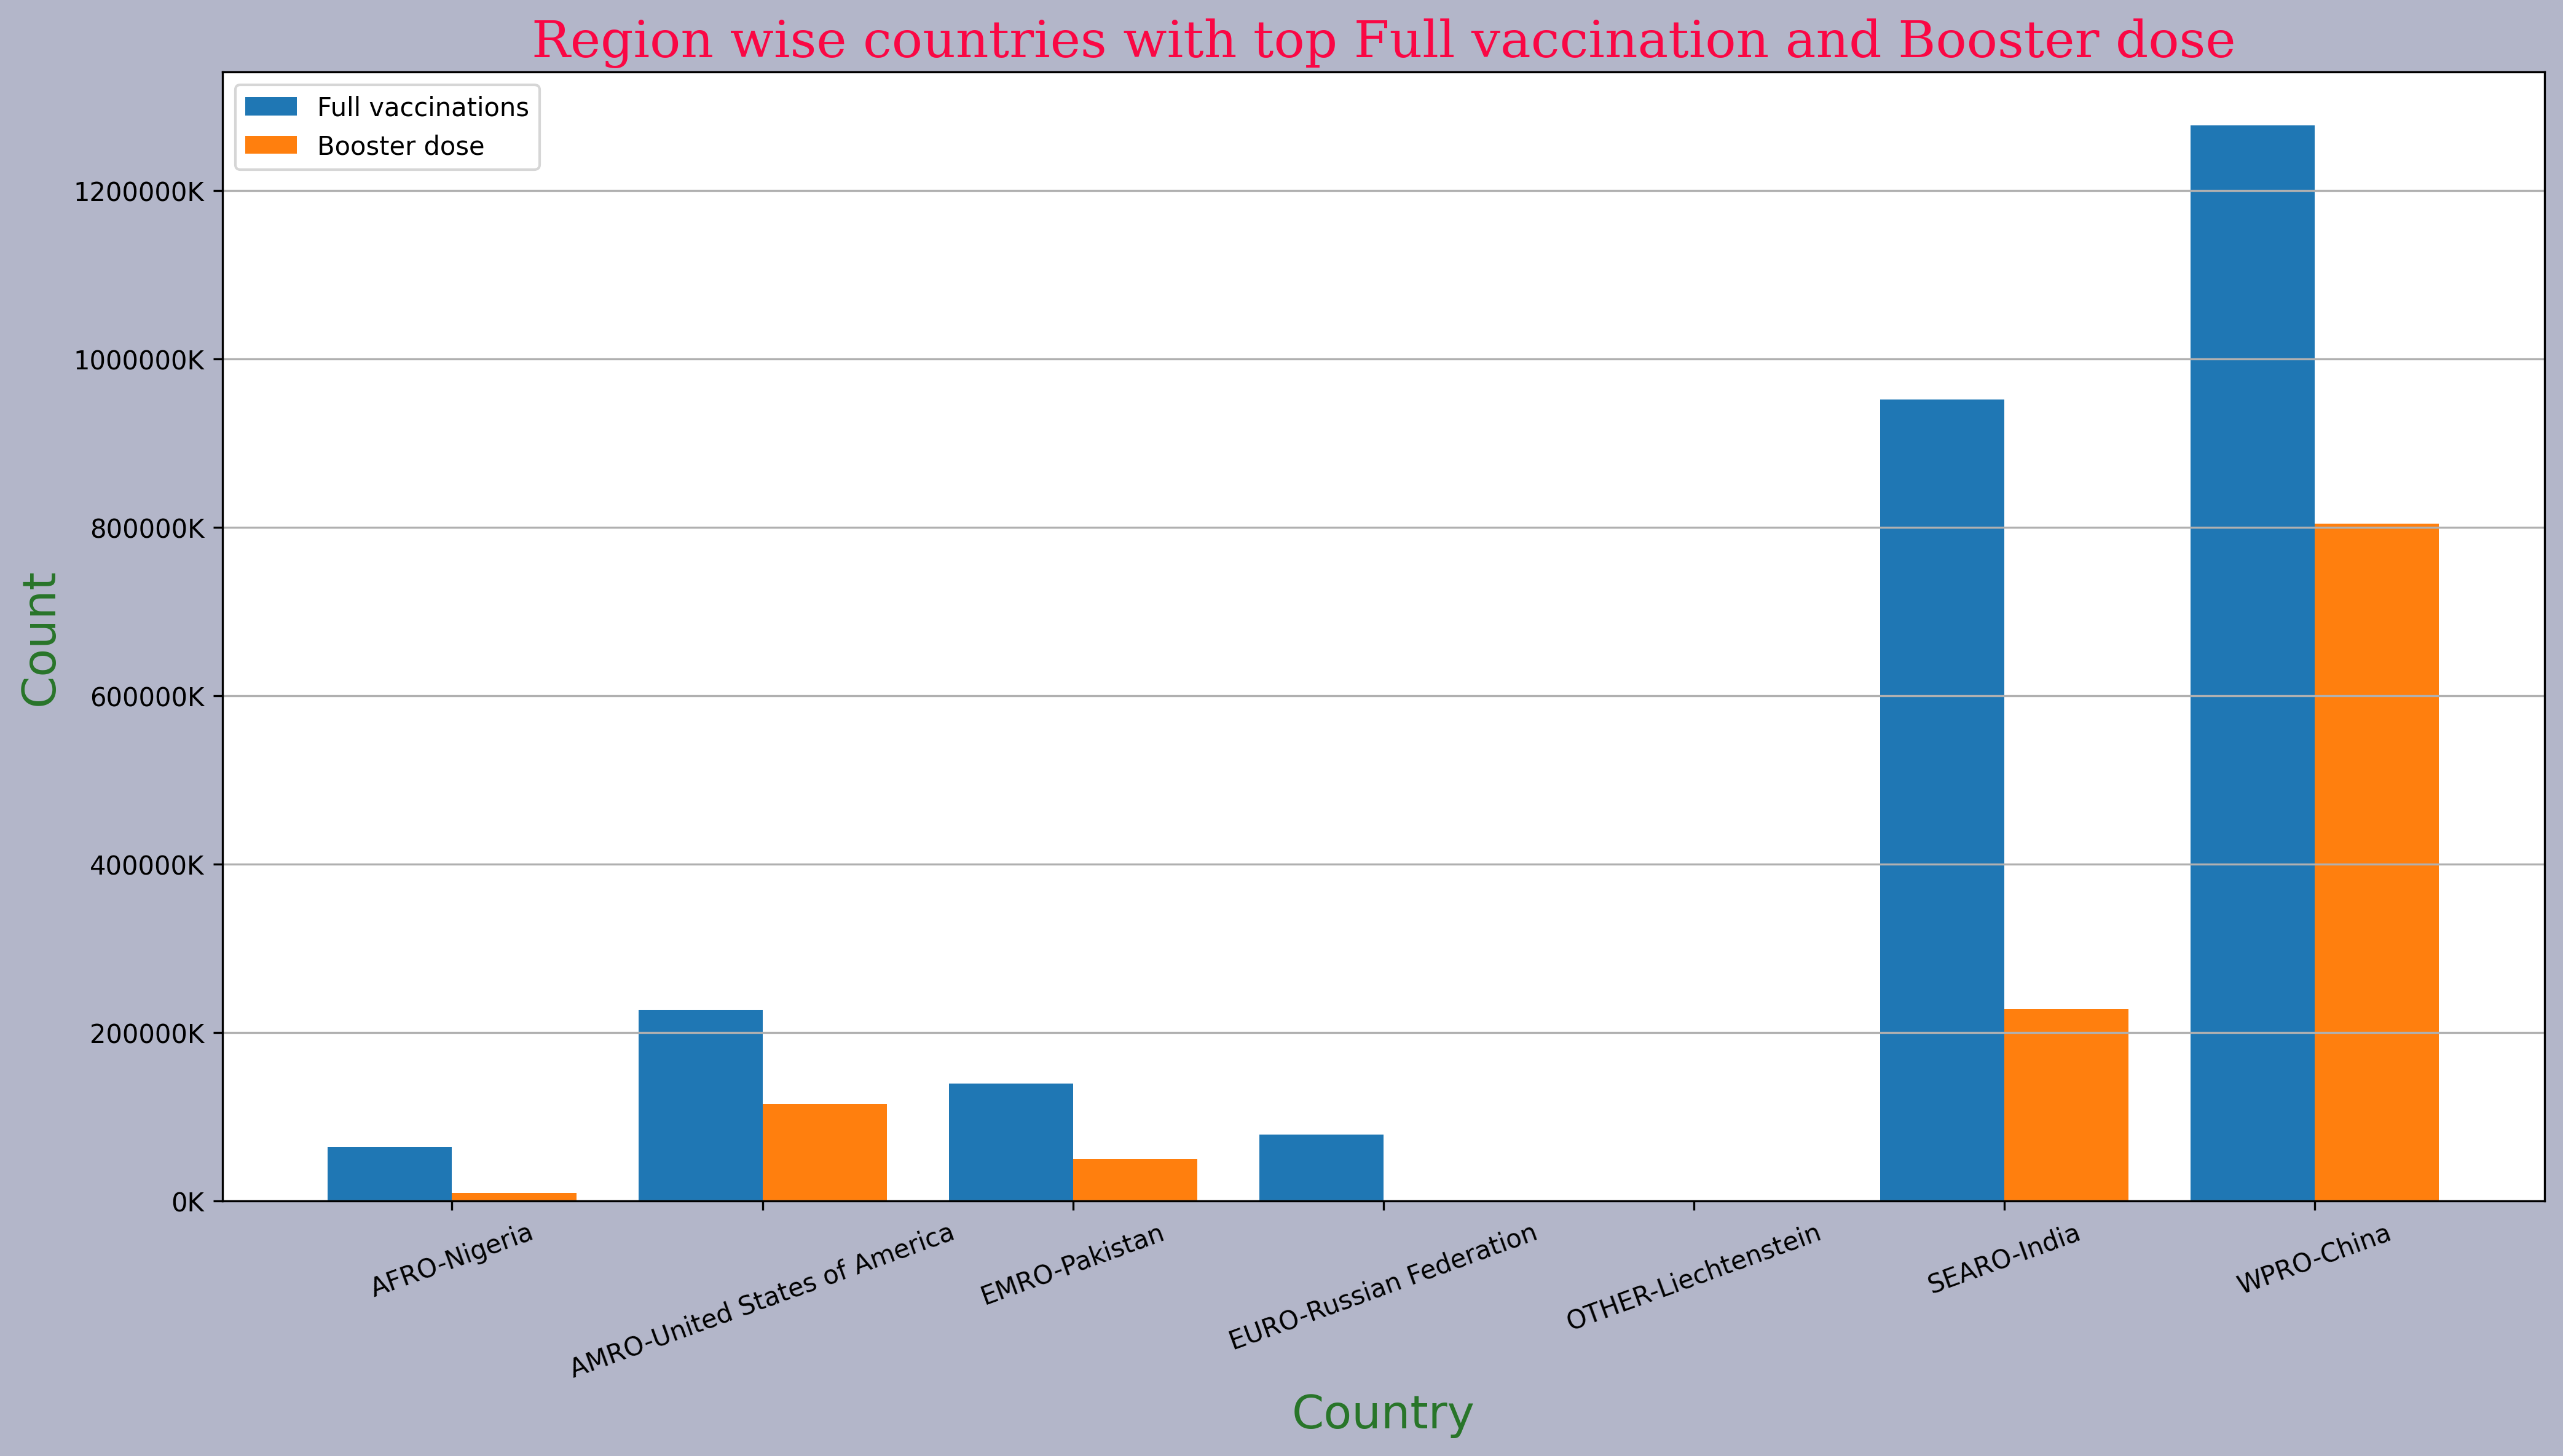

In [835]:
# Plot a grouped bar chart showing the Full vaccinations and booster doses across all WHO_regions
fig,axes=plt.subplots(facecolor='#b3b6c9',figsize=(14,8),dpi=300)
plt.bar(np.arange(len(Vaccine_proactive_countries)),Vaccine_proactive_countries['PERSONS_FULLY_VACCINATED'].values.tolist(),label='Full vaccinations',width=0.4)
plt.bar(np.arange(len(Vaccine_proactive_countries))+0.4,Vaccine_proactive_countries['PERSONS_BOOSTER_ADD_DOSE'].values.tolist(),label='Booster dose',width=0.4)
plt.xticks(np.arange(len(Vaccine_proactive_countries.index))+0.2,xlabels,rotation=20)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xlabel('Country',size=18,color='#287529')
def scaling_cases_count1(x, pos):
    return f'{x/1000:.0f}K'

y_formatter = ticker.FuncFormatter(scaling_cases_count1)
axes.yaxis.set_major_formatter(y_formatter)

plt.grid(axis='y')
plt.ylabel('Count',size=18,color='#287529')
plt.legend()
plt.title('Region wise countries with top Full vaccination and Booster dose',color='#fa0744',family='serif',size=20)
plt.tight_layout();


###### 4. For an input time period(ex: 2022 Jan), plot a pie chart showing each WHO_region-Country with total number of cases and deaths observed in that month

In [842]:
Inp_time_frame=input('Enter month-year in MMM-YYYY format(month in 3 letters): ').title().replace(' ','-')
Inp_time_frame
month =Inp_time_frame.split('-')[0]
year =Inp_time_frame.split('-')[1]


Enter month-year in MMM-YYYY format(month in 3 letters): aug 2021


In [843]:
reg_wise_cases=Cases_Df[(Cases_Df['Date_reported'].dt.strftime('%b') == month) & (Cases_Df['Date_reported'].dt.year == int(year))].groupby('WHO_region')['New_cases'].agg('sum').sort_values(ascending=False)

reg_wise_deaths=Cases_Df[(Cases_Df['Date_reported'].dt.strftime('%b') == month) & (Cases_Df['Date_reported'].dt.year == int(year))].groupby('WHO_region')['New_deaths'].agg('sum').sort_values(ascending=False)

reg_wise_cases= reg_wise_cases.loc[reg_wise_cases.index != 'Other']

reg_wise_deaths= reg_wise_deaths.loc[reg_wise_deaths.index != 'Other']


print(reg_wise_cases)
print(reg_wise_deaths)


WHO_region
AMRO     6749922
EURO     5153240
SEARO    3001996
WPRO     2082330
EMRO     2070407
AFRO      743516
Name: New_cases, dtype: int64
WHO_region
AMRO     101300
SEARO     77692
EURO      53547
EMRO      30959
WPRO      25371
AFRO      18876
Name: New_deaths, dtype: int64


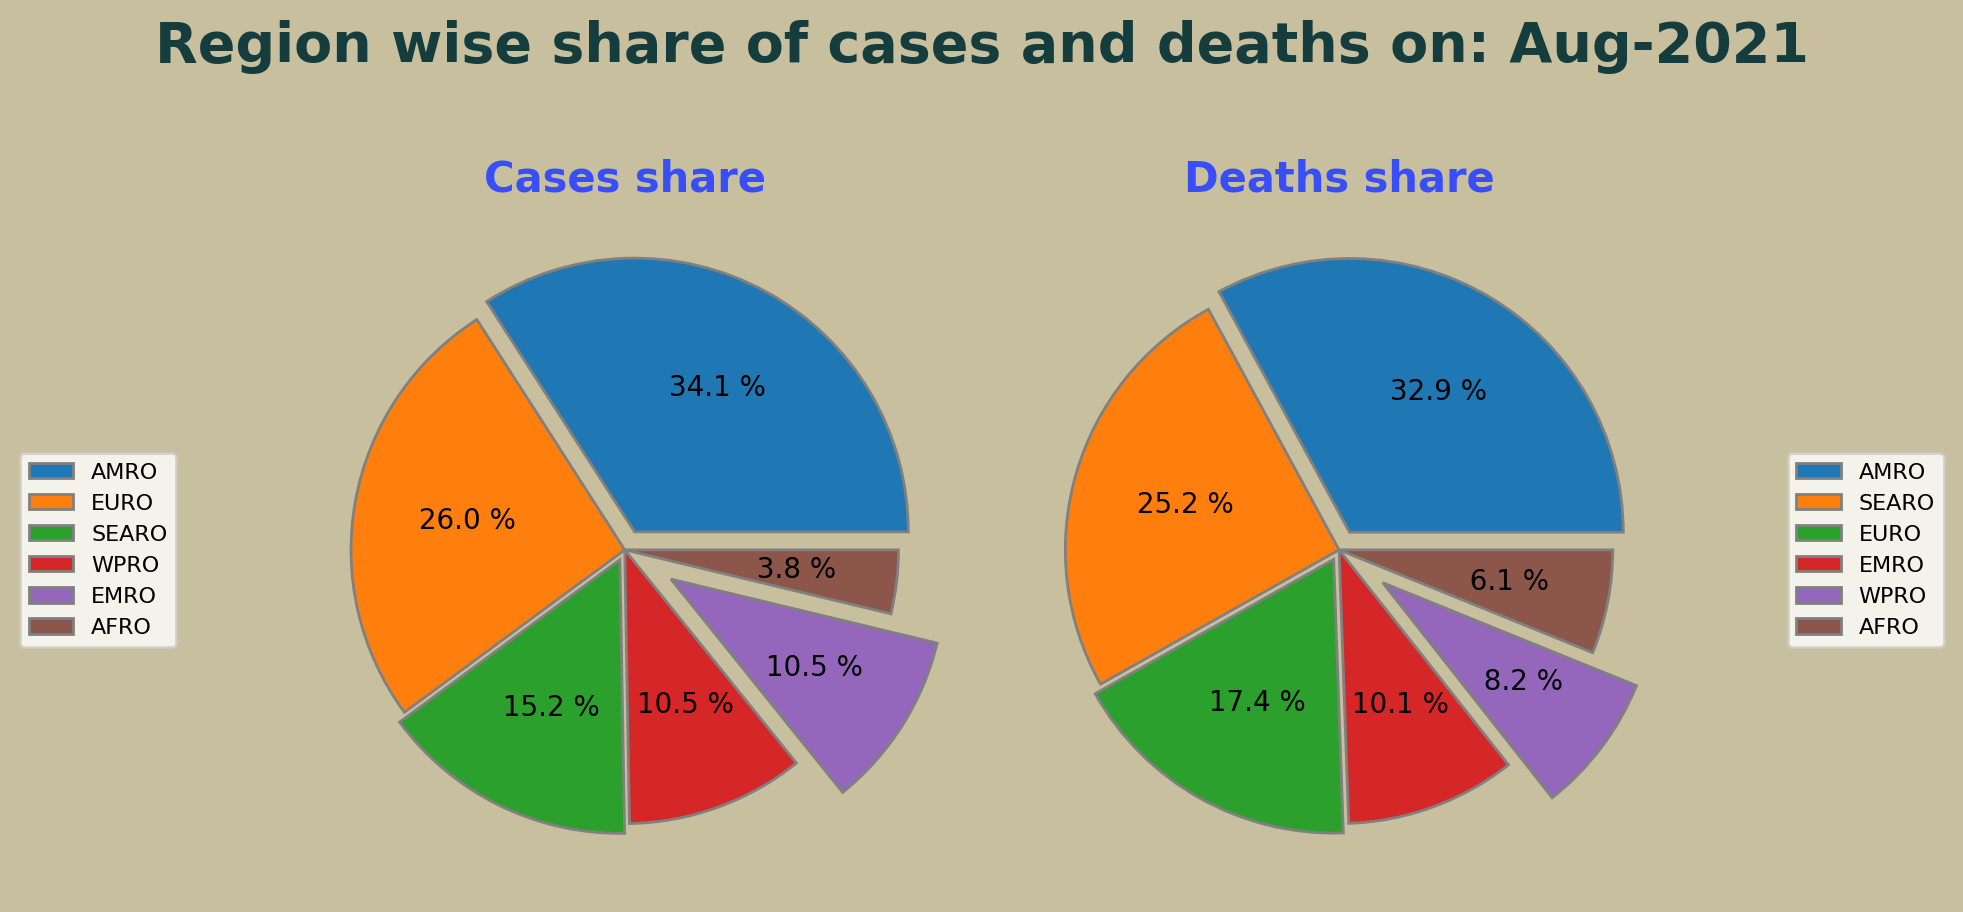

In [845]:
fig,axes=plt.subplots(1,2,facecolor='#c7bf9d',figsize=(10,5),dpi=200)
plt.suptitle('Region wise share of cases and deaths on: '+Inp_time_frame,color='#163d3d',weight='bold',size=20)
axes[0].pie(reg_wise_cases,autopct='%5.1f %%',explode=(0.075,0,0.04,0,0.2,0),labeldistance=1.075,wedgeprops={'linewidth':1,'edgecolor':'gray'})
axes[0].legend(reg_wise_cases.index.tolist(), loc='center left', bbox_to_anchor=(-0.40, .5), fontsize=8)
axes[0].set_title('Cases share',color='#374efa',weight='bold',size=15)
axes[1].pie(reg_wise_deaths,autopct='%5.1f %%',labeldistance=1.075,explode=(0.075,0,0.04,0,0.2,0),wedgeprops={'linewidth':1,'edgecolor':'gray'})
axes[1].legend(reg_wise_deaths.index.tolist(), loc='center right', bbox_to_anchor=(1.4, .5), fontsize=8)
axes[1].set_title('Deaths share',color='#374efa',weight='bold',size=15)
plt.tight_layout();


Heatmap for cases in: Aug-2021


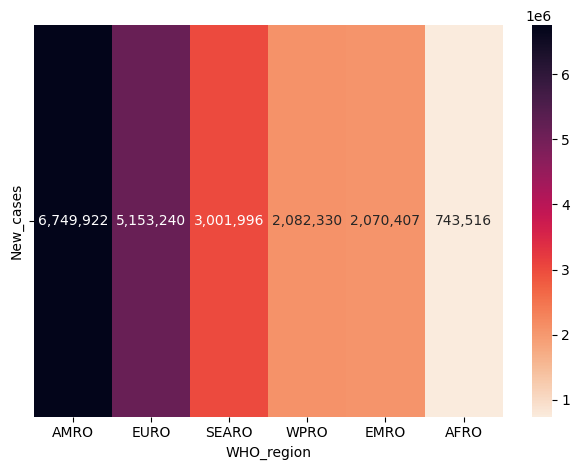

In [861]:
# Heatmap for inp_month

df = reg_wise_cases.to_frame().T
df1 = reg_wise_deaths.to_frame().T
print('Heatmap for cases in:',Inp_time_frame)
# Create a heatmap using Seaborn
sns.heatmap(df, cmap='rocket_r', annot=True, fmt=',.0f')
plt.tight_layout();

Heatmap for deaths in: Aug-2021


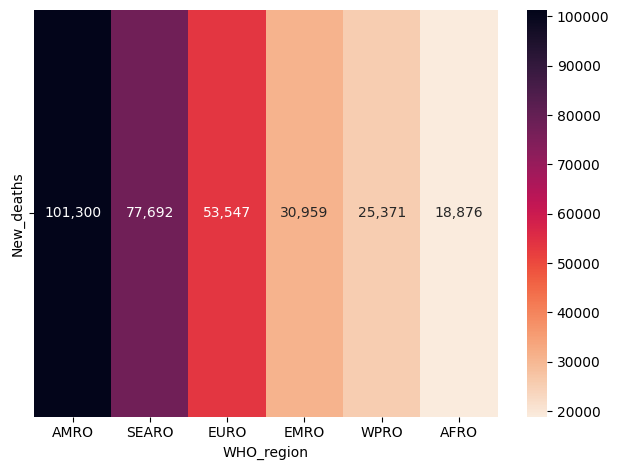

In [862]:
print('Heatmap for deaths in:',Inp_time_frame)
# Create a heatmap using Seaborn
sns.heatmap(df1, cmap='rocket_r', annot=True, fmt=',.0f')
plt.tight_layout();